In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
import numpy as np
import pandas as pd

## A simple example

<Figure size 576x396 with 0 Axes>

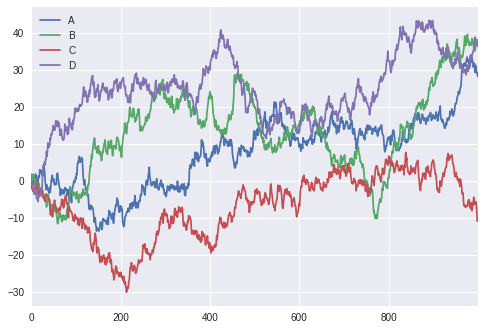

In [3]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  columns=list('ABCD'))

df = df.cumsum()

plt.figure()

df.plot()
plt.show()

## Exploring a Gapminder dataset

### 1) Read CSV data

In [3]:
gapminder_df = pd.read_csv('data/gapminder.csv')

### 2) Reshape data

In [4]:
countries_to_filter = ["Iran", "Vietnam", "Egypt", "Namibia",
                      "Ireland", "Hungary", "Canada", "Argentina"]

In [74]:
data = {}

all_years = range(1952, 2008)

for c in countries_to_filter:
    data[c] = []
    df = gapminder_df[gapminder_df.country == c]
    for yr in all_years:
        if yr not in list(df.year):
            data[c].append(np.NaN)
        else:
            year_idx = df[df.year==yr].index[0]
            life_exp = df.loc[year_idx, "lifeExp"]
            data[c].append(life_exp)

### 3) Plot

In [49]:
plt.style.use("seaborn-talk")

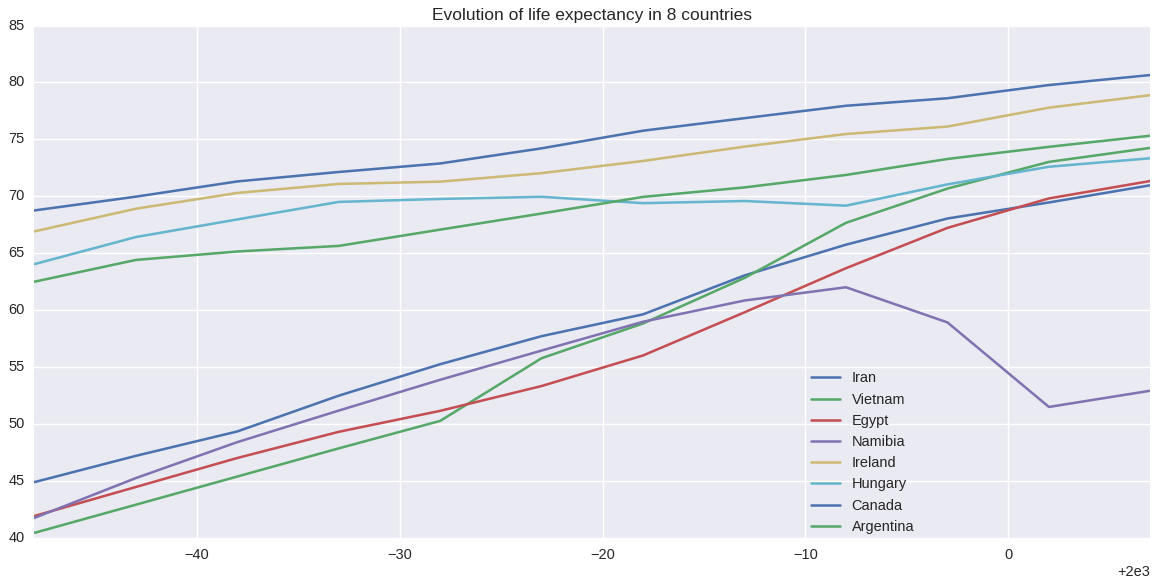

In [75]:
data_df = pd.DataFrame(data, index=all_years)

plot = data_df.dropna().plot(figsize=(18,8), title='Evolution of life expectancy in 8 countries', legend=True)
plot.legend(bbox_to_anchor=(.8, .35));

# If you don't need to save an image of the plot you can use one line: 
# data_df.dropna().plot(figsize=(18,8)).legend(bbox_to_anchor=(.8, .35))

In [76]:
fig = plot.get_figure()
fig.savefig("plots/pd-lineplot.png")